## Data Transformation
Transformation of the data to remove outliers in the continous category columns
### Skewed continous columns 
The data is first visualized to ascertain the location of most outlier values. 
Four columns with outliers are selected for the transformation : elpsdm, n24, rev24 and revlast. 
### Transformation Strategy
We apply both the log transformation and square root transformation methods to transform the data columns to a fairly symmetrical distribution. 

In [1]:
import pandas as pd 

import numpy as np 

import seaborn as sns
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt 

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [3]:
df = pd.read_csv('../datasets/dmtrain.csv')

In [4]:
df.head()

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat,response
0,1,2,30.0,20.0,24,1,6,1
1,2,25,207.0,20.0,24,1,6,0
2,3,5,52.0,15.0,24,1,6,0
3,4,11,105.0,15.0,24,1,6,0
4,5,2,32.0,17.0,24,1,6,0


In [5]:
df.columns

Index(['id', 'n24', 'rev24', 'revlast', 'elpsdm', 'ordfreq', 'ordcat',
       'response'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2000 non-null   int64  
 1   n24       2000 non-null   int64  
 2   rev24     2000 non-null   float64
 3   revlast   2000 non-null   float64
 4   elpsdm    2000 non-null   int64  
 5   ordfreq   2000 non-null   int64  
 6   ordcat    2000 non-null   int64  
 7   response  2000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 125.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2000.0,1000.500000,577.494589,1.0,500.75,1000.50,1500.2500,2000.0
n24,2000.0,10.285500,8.814070,1.0,4.00,8.00,14.0000,82.0
rev24,2000.0,107.830895,126.751417,15.0,43.00,80.95,131.8125,2200.0
revlast,2000.0,16.863475,16.623265,0.0,10.00,15.00,20.0000,415.0
elpsdm,2000.0,15.111000,4.150939,1.0,13.00,15.00,17.0000,24.0
ordfreq,2000.0,2.024000,1.108620,1.0,1.00,2.00,3.0000,4.0
ordcat,2000.0,5.727000,0.869396,4.0,5.00,6.00,6.0000,7.0
response,2000.0,0.292000,0.454796,0.0,0.00,0.00,1.0000,1.0


In [8]:
df.columns

Index(['id', 'n24', 'rev24', 'revlast', 'elpsdm', 'ordfreq', 'ordcat',
       'response'],
      dtype='object')

In [9]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
id,0.000000,-1.200000
n24,1.935635,6.985968
rev24,7.221135,83.587880
revlast,11.968288,226.572748
elpsdm,-0.774676,2.451534
ordfreq,0.611939,-1.052128
ordcat,-0.338221,-0.509773
response,0.915611,-1.162820


In [15]:
pair_cols = ['n24', 'rev24', 'revlast', 'elpsdm']

In [16]:
df[pair_cols].agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
n24,1.935635,6.985968
rev24,7.221135,83.587880
revlast,11.968288,226.572748
elpsdm,-0.774676,2.451534


##### n24 - highly
##### rev24 highly skewed
##### revlast - highly skewed
##### elpsdm - moderate skewed 


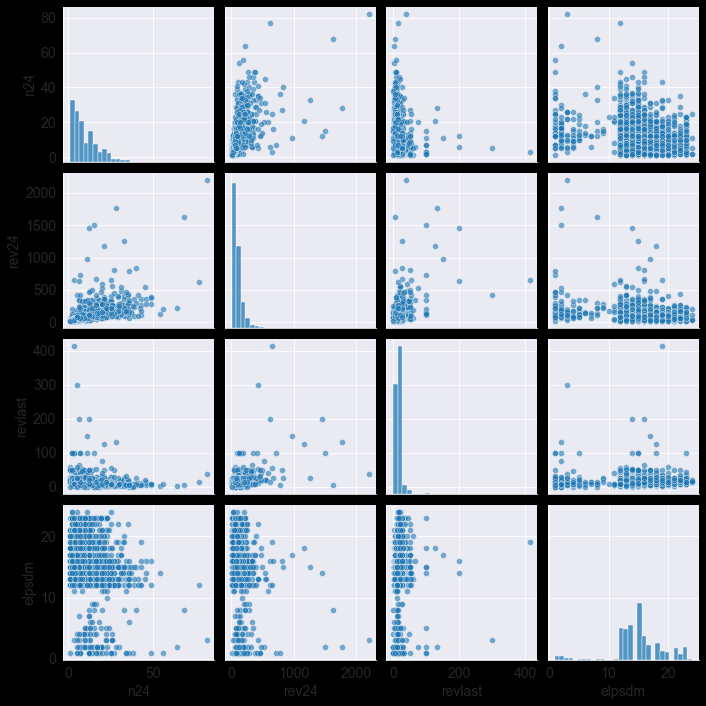

In [17]:
sns.pairplot(df[pair_cols], plot_kws={'alpha':0.6}, diag_kws={'bins':30})

In [24]:
df.head()

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat,response
0,1,2,30.0,20.0,24,1,6,1
1,2,25,207.0,20.0,24,1,6,0
2,3,5,52.0,15.0,24,1,6,0
3,4,11,105.0,15.0,24,1,6,0
4,5,2,32.0,17.0,24,1,6,0


In [40]:
df.insert(len(df.columns), 'n24_t_t', np.log(df['n24']))

In [28]:
df.insert(len(df.columns), 'rev24_t', np.log(df['rev24']))

In [41]:
#df.insert(len(df.columns), 'revlast_t', np.log(df['revlast']))

df.insert(len(df.columns), 'revlast_t_t', np.sqrt(df.iloc[:,3]))

In [30]:
df.head()

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat,response,n24_t,rev24_t,revlast_t
0,1,2,30.0,20.0,24,1,6,1,0.693147,3.401197,2.995732
1,2,25,207.0,20.0,24,1,6,0,3.218876,5.332719,2.995732
2,3,5,52.0,15.0,24,1,6,0,1.609438,3.951244,2.708050
3,4,11,105.0,15.0,24,1,6,0,2.397895,4.653960,2.708050
4,5,2,32.0,17.0,24,1,6,0,0.693147,3.465736,2.833213


In [31]:
df.insert(len(df.columns), 'elpsdm_t', np.log(max(df.iloc[:, 4]+1) - df.iloc[:, 4]))

In [43]:
df.head()

,id,n24,rev24,revlast,elpsdm,ordfreq,ordcat,response,n24_t,rev24_t,revlast_t,elpsdm_t,n24_t_t,revlast_t_t
0,1,2,30.0,20.0,24,1,6,1,0.693147,3.401197,2.995732,0.0,0.693147,4.472136
1,2,25,207.0,20.0,24,1,6,0,3.218876,5.332719,2.995732,0.0,3.218876,4.472136
2,3,5,52.0,15.0,24,1,6,0,1.609438,3.951244,2.708050,0.0,1.609438,3.872983
3,4,11,105.0,15.0,24,1,6,0,2.397895,4.653960,2.708050,0.0,2.397895,3.872983
4,5,2,32.0,17.0,24,1,6,0,0.693147,3.465736,2.833213,0.0,0.693147,4.123106


In [42]:
t_cols = ['n24_t','rev24_t', 'revlast_t_t', 'elpsdm_t']

In [44]:
df[t_cols].agg(['skew']).transpose()


,skew
n24_t,-0.442413
rev24_t,0.127623
revlast_t_t,2.958197
elpsdm_t,-1.369497


In [46]:
df.insert(len(df.columns), 'revlast_t_t_1', np.sqrt(df.iloc[:,3]))


In [47]:
df.insert(len(df.columns), 'elpsdm_t_t_1', np.log(max(df.iloc[:, 4]+1) - df.iloc[:, 4]))

In [50]:
new_t_cols = ['n24_t', 'rev24_t', 'elpsdm_t_t_1', 'revlast_t_t_1']

In [52]:
df[new_t_cols].agg(['skew']).transpose()

,skew
n24_t,-0.442413
rev24_t,0.127623
elpsdm_t_t_1,-1.369497
revlast_t_t_1,2.958197


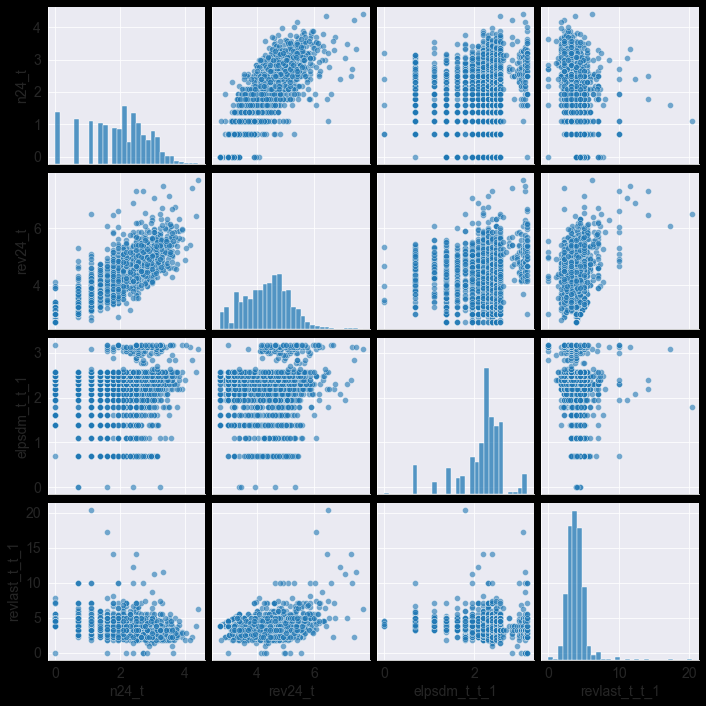

In [51]:
sns.pairplot(df[new_t_cols], plot_kws={'alpha':0.6}, diag_kws={'bins':30})

In [53]:
df.columns

Index(['id', 'n24', 'rev24', 'revlast', 'elpsdm', 'ordfreq', 'ordcat',
       'response', 'n24_t', 'rev24_t', 'revlast_t', 'elpsdm_t', 'n24_t_t',
       'revlast_t_t', 'revlast_t_t_1', 'elpsdm_t_t_1'],
      dtype='object')

In [54]:
new_cols = ['id','n24_t', 'rev24_t', 'elpsdm_t_t_1', 'revlast_t_t_1', 'ordfreq', 'ordcat','response']

In [55]:
new_df = df[new_cols]

In [56]:
new_df.head()

,id,n24_t,rev24_t,elpsdm_t_t_1,revlast_t_t_1,ordfreq,ordcat,response
0,1,0.693147,3.401197,0.0,4.472136,1,6,1
1,2,3.218876,5.332719,0.0,4.472136,1,6,0
2,3,1.609438,3.951244,0.0,3.872983,1,6,0
3,4,2.397895,4.653960,0.0,3.872983,1,6,0
4,5,0.693147,3.465736,0.0,4.123106,1,6,0


In [57]:
new_df.to_csv('dm_train_t.csv', index=None)